In [1]:
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file = uproot.open("/Users/lydiaamstutz/ATLAS/trigger efficiencies/hptaunu_signal.root")

file.keys()

for k in file:
    print(k, type(file[k]))


CutBookkeeper_569178_450000_NOSYS;1 <class 'uproot.models.TH.Model_TH1F_v3'>
EventLoop_EventCount;1 <class 'uproot.models.TH.Model_TH1D_v3'>
EventLoop_FileExecuted;1 <class 'uproot.models.TTree.Model_TTree_v20'>
EventLoop_JobStats;1 <class 'uproot.models.TTree.Model_TTree_v20'>
EventLoop_RunTime;1 <class 'uproot.models.TH.Model_TH1D_v3'>
cflow_AnaElectrons_tight_NOSYS;1 <class 'uproot.models.TH.Model_TH1F_v3'>
cflow_AnaJets_baselineJvt_NOSYS;1 <class 'uproot.models.TH.Model_TH1F_v3'>
cflow_AnaMuons_tight_NOSYS;1 <class 'uproot.models.TH.Model_TH1F_v3'>
cflow_AnaTauJets_tight_NOSYS;1 <class 'uproot.models.TH.Model_TH1F_v3'>
listOfSystematics;1 <class 'uproot.models.TH.Model_TH1F_v3'>
metadata;1 <class 'uproot.models.TH.Model_TH1I_v3'>
reco;1 <class 'uproot.models.TTree.Model_TTree_v20'>


In [3]:
tree = file["reco"]   
print("num branches:", len(tree.keys()))

# print a few branch names to see what's in here
for k in list(tree.keys())[:30]:
    print(k)


num branches: 136
actualInteractionsPerCrossing
averageInteractionsPerCrossing
bootstrapWeights
el_IFFClass
el_charge
el_eta
el_phi
el_trigMatched_HLT_e140_lhloose_L1eEM26M
el_trigMatched_HLT_e26_lhtight_ivarloose_L1eEM26M
el_trigMatched_HLT_e60_lhmedium_L1eEM26M
eventNumber
jet_GN2v01_Continuous_quantile
jet_GN2v01_FixedCutBEff_65_select
jet_GN2v01_FixedCutBEff_70_select
jet_GN2v01_FixedCutBEff_77_select
jet_GN2v01_FixedCutBEff_85_select
jet_GN2v01_FixedCutBEff_90_select
jet_eta
jet_phi
mcChannelNumber
mu_IFFClass
mu_charge
mu_eta
mu_phi
mu_trigMatched_HLT_mu24_ivarmedium_L1MU14FCH
mu_trigMatched_HLT_mu50_L1MU14FCH
runNumber
tau_NNDecayMode
tau_charge
tau_eta


In [4]:
# find what the tau trigger branches are actually called in this ntuple
keys = tree.keys()

tau_like = [k for k in keys if ("trigPassed_HLT_tau" in k) or ("tau50" in k) or ("mediumRNN" in k)]
print("found", len(tau_like), "tau-ish branches")
for k in tau_like[:80]:
    print(k)


found 2 tau-ish branches
trigPassed_HLT_tau50_mediumRNN_tracktwoMVA_xe80_pfopufit_xe50_cell_L1XE50
trigPassed_HLT_tau50_mediumRNN_tracktwoMVA_xe80_tcpufit_xe50_cell_L1XE50


In [5]:
# find tau pt branch name in this ntuple
tau_pt_candidates = [k for k in tree.keys() if ("tau" in k.lower()) and ("pt" in k.lower())]
print("tau pt candidates:", tau_pt_candidates)


tau pt candidates: ['tau_truth_pt_invis', 'tau_truth_pt_vis', 'tau_pt_NOSYS']


In [6]:
# find jet pt branch name in this ntuple
jet_pt_candidates = [k for k in tree.keys() if ("jet" in k.lower()) and ("pt" in k.lower())]
print("jet pt candidates:", jet_pt_candidates)


jet pt candidates: ['jet_pt_NOSYS']


In [7]:
##check that the file loaded correctly

branches = [
    "eventNumber",
    "met_met_NOSYS",

    "trigPassed_HLT_xe65_cell_xe90_pfopufit_L1XE50",
    "trigPassed_HLT_xe80_cell_xe115_tcpufit_L1XE50",

    "trigPassed_HLT_j70_0eta290_020jvt_bgn160_3j70_pf_ftf_preselj50b85XX3j50_L14J20",
    "trigPassed_HLT_j75_0eta290_020jvt_bgn160_3j75_pf_ftf_preselj50b85XX3j50_L14J20",
    "tau_pt_NOSYS",
    "jet_pt_NOSYS",
    "jet_GN2v01_FixedCutBEff_85_select",
]
#add the taus
branches += [
    "trigPassed_HLT_tau50_mediumRNN_tracktwoMVA_xe80_tcpufit_xe50_cell_L1XE50",
    "trigPassed_HLT_tau50_mediumRNN_tracktwoMVA_xe80_pfopufit_xe50_cell_L1XE50",
]


arr = tree.arrays(branches, library="ak")

data = {}

for k in branches:
    if arr[k].ndim == 1:
        data[k] = np.array(arr[k])
    else:
        data[k] = arr[k].to_list()

df = pd.DataFrame(data)
offline_met_gev = df["met_met_NOSYS"].values / 1000.0



In [8]:
print("rows:", len(df))
print("unique events:", df["eventNumber"].nunique())
print("any NaNs in MET:", df["met_met_NOSYS"].isna().any())

print("MET min/max:", df["met_met_NOSYS"].min(), df["met_met_NOSYS"].max())


rows: 97792
unique events: 97792
any NaNs in MET: False
MET min/max: 0.0 941976.3


In [9]:
met_pf = (df["trigPassed_HLT_xe65_cell_xe90_pfopufit_L1XE50"] == 1)
met_hi = (df["trigPassed_HLT_xe80_cell_xe115_tcpufit_L1XE50"] == 1)

j70 = (df["trigPassed_HLT_j70_0eta290_020jvt_bgn160_3j70_pf_ftf_preselj50b85XX3j50_L14J20"] == 1)
j75 = (df["trigPassed_HLT_j75_0eta290_020jvt_bgn160_3j75_pf_ftf_preselj50b85XX3j50_L14J20"] == 1)

tau_tcp = (df["trigPassed_HLT_tau50_mediumRNN_tracktwoMVA_xe80_tcpufit_xe50_cell_L1XE50"] == 1)
tau_pf  = (df["trigPassed_HLT_tau50_mediumRNN_tracktwoMVA_xe80_pfopufit_xe50_cell_L1XE50"] == 1)



In [10]:
print("PF-MET eff:", met_pf.mean(), "passed:", met_pf.sum())
print("xe80/xe115 eff:", met_hi.mean(), "passed:", met_hi.sum())
print("J70 eff:", j70.mean(), "passed:", j70.sum())
print("J75 eff:", j75.mean(), "passed:", j75.sum())
print("TAU tcp eff:", tau_tcp.mean(), "passed:", tau_tcp.sum())
print("TAU pf  eff:", tau_pf.mean(),  "passed:", tau_pf.sum())


PF-MET eff: 0.14637189136125656 passed: 14314
xe80/xe115 eff: 0.09383180628272252 passed: 9176
J70 eff: 0.04772374018324607 passed: 4667
J75 eff: 0.03617882853403141 passed: 3538
TAU tcp eff: 0.02714946007853403 passed: 2655
TAU pf  eff: 0.02521678664921466 passed: 2466


In [11]:
# J70 vs PF
print("\nJ70 vs PF-MET")
print("J70 only:", (j70 & ~met_pf).sum())
print("PF only:", (~j70 & met_pf).sum())
print("both:", (j70 & met_pf).sum())
print("frac(J70 not PF):", (j70 & ~met_pf).sum() / j70.sum() if j70.sum() > 0 else "NA")

# J75 vs PF
print("\nJ75 vs PF-MET")
print("J75 only:", (j75 & ~met_pf).sum())
print("PF only:", (~j75 & met_pf).sum())
print("both:", (j75 & met_pf).sum())
print("frac(J75 not PF):", (j75 & ~met_pf).sum() / j75.sum() if j75.sum() > 0 else "NA")

# J70 vs J75
print("\nJ70 vs J75")
print("J70 only:", (j70 & ~j75).sum())
print("J75 only:", (j75 & ~j70).sum())
print("both:", (j70 & j75).sum())

print("\nTAU (pf) vs PF-MET")
print("tau only:", (tau_pf & ~met_pf).sum())
print("PF only:", (~tau_pf & met_pf).sum())
print("both:", (tau_pf & met_pf).sum())

print("\nTAU pf vs TAU tcp")
print("pf only:", (tau_pf & ~tau_tcp).sum())
print("tcp only:", (~tau_pf & tau_tcp).sum())
print("both:", (tau_pf & tau_tcp).sum())

print("\nPF-MET vs tcpufit MET")
print("PF only:", (met_pf & ~met_hi).sum())
print("tcp only:", (~met_pf & met_hi).sum())
print("both:", (met_pf & met_hi).sum())



J70 vs PF-MET
J70 only: 3355
PF only: 13002
both: 1312
frac(J70 not PF): 0.7188772230554961

J75 vs PF-MET
J75 only: 2486
PF only: 13262
both: 1052
frac(J75 not PF): 0.7026568682871679

J70 vs J75
J70 only: 1129
J75 only: 0
both: 3538

TAU (pf) vs PF-MET
tau only: 653
PF only: 12501
both: 1813

TAU pf vs TAU tcp
pf only: 329
tcp only: 518
both: 2137

PF-MET vs tcpufit MET
PF only: 5733
tcp only: 595
both: 8581


In [12]:
pf_or_j70 = (met_pf | j70).mean()
pf_or_j75 = (met_pf | j75).mean()
pf_or_both = (met_pf | j70 | j75).mean()

print("PF only:", met_pf.mean())
print("PF OR J70:", pf_or_j70)
print("PF OR J75:", pf_or_j75)
print("PF OR J70 OR J75:", pf_or_both)

pf_or_j70_or_tau = (met_pf | j70 | tau_pf).mean()
pf_or_all = (met_pf | met_hi | j70 | j75 | tau_pf | tau_tcp).mean()

print("PF OR J70 OR tau_pf:", pf_or_j70_or_tau)
print("PF OR all (MET+BJET+TAU):", pf_or_all)


PF only: 0.14637189136125656
PF OR J70: 0.18067940117801048
PF OR J75: 0.1717931937172775
PF OR J70 OR J75: 0.18067940117801048
PF OR J70 OR tau_pf: 0.1865592277486911
PF OR all (MET+BJET+TAU): 0.19593627290575916


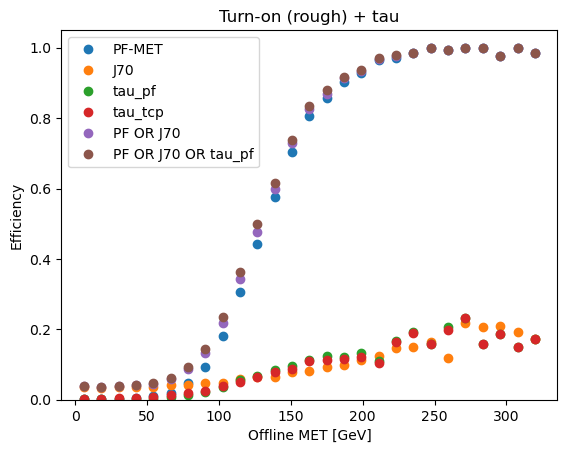

In [13]:
# updated to include tau triggers

PF_OR_J70 = (met_pf | j70)
PF_OR_J70_OR_TAU = (met_pf | j70 | tau_pf)   

bins = np.linspace(0, 350, 30)

centers = []
eff_pf = []
eff_j70 = []
eff_tau_pf = []
eff_tau_tcp = []
eff_or = []
eff_or_all = []

for i in range(len(bins) - 1):
    lo = bins[i]
    hi = bins[i + 1]
    sel = (offline_met_gev >= lo) & (offline_met_gev < hi)

    centers.append((lo + hi) / 2)

    if sel.sum() < 50:
        eff_pf.append(np.nan)
        eff_j70.append(np.nan)
        eff_tau_pf.append(np.nan)
        eff_tau_tcp.append(np.nan)
        eff_or.append(np.nan)
        eff_or_all.append(np.nan)
    else:
        eff_pf.append(met_pf[sel].mean())
        eff_j70.append(j70[sel].mean())
        eff_tau_pf.append(tau_pf[sel].mean())
        eff_tau_tcp.append(tau_tcp[sel].mean())
        eff_or.append(PF_OR_J70[sel].mean())
        eff_or_all.append(PF_OR_J70_OR_TAU[sel].mean())

plt.figure()
plt.plot(centers, eff_pf, "o", label="PF-MET")
plt.plot(centers, eff_j70, "o", label="J70")
plt.plot(centers, eff_tau_pf, "o", label="tau_pf")
plt.plot(centers, eff_tau_tcp, "o", label="tau_tcp")
plt.plot(centers, eff_or, "o", label="PF OR J70")
plt.plot(centers, eff_or_all, "o", label="PF OR J70 OR tau_pf")

plt.xlabel("Offline MET [GeV]")
plt.ylabel("Efficiency")
plt.ylim(0, 1.05)
plt.legend()
plt.title("Turn-on (rough) + tau")
plt.show()




lead tau pt min/max (GeV): 25.000923828125 472.6046875


Text(0.5, 0, 'leading tau pT')

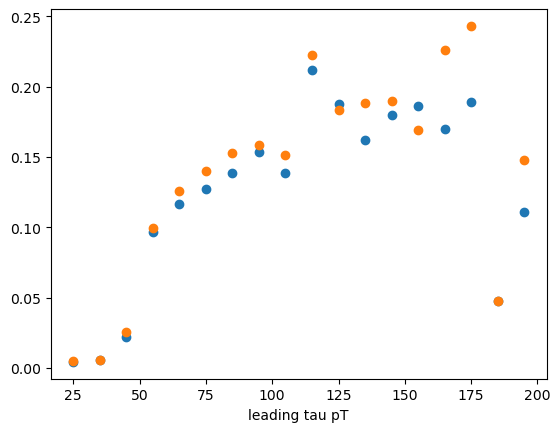

In [16]:
# tau trigger efficiency vs leading tau pt 

lead_tau_pt = []

for i in range(len(df)):
    pts = df["tau_pt_NOSYS"][i]  # list of tau pts (MeV)
    if len(pts) > 0:
        lead_tau_pt.append(max(pts) / 1000.0)  # GeV
    else:
        lead_tau_pt.append(np.nan)

lead_tau_pt = np.array(lead_tau_pt)

print("lead tau pt min/max (GeV):", np.nanmin(lead_tau_pt), np.nanmax(lead_tau_pt))

bins_tau = np.linspace(0, 300, 31)
centers = []
eff_tau_pf_pt = []
eff_tau_tcp_pt = []

for i in range(len(bins_tau) - 1):
    lo = bins_tau[i]
    hi = bins_tau[i + 1]
    sel = (lead_tau_pt >= lo) & (lead_tau_pt < hi) & np.isfinite(lead_tau_pt)

    centers.append((lo + hi) / 2)

    if sel.sum() < 20:   # smaller cutoff so don't get a billion NaNs
        eff_tau_pf_pt.append(np.nan)
        eff_tau_tcp_pt.append(np.nan)
    else:
        eff_tau_pf_pt.append(tau_pf[sel].mean())
        eff_tau_tcp_pt.append(tau_tcp[sel].mean())

plt.figure()
plt.plot(centers, eff_tau_pf_pt, "o", label="tau_pf")
plt.plot(centers, eff_tau_tcp_pt, "o", label="tau_tcp")
plt.xlabel("leading tau pT")



lead b-jet pt min/max (GeV): 25.0004921875 1533.62225
fraction of events with >=1 b85 jet: 0.8605918684554974


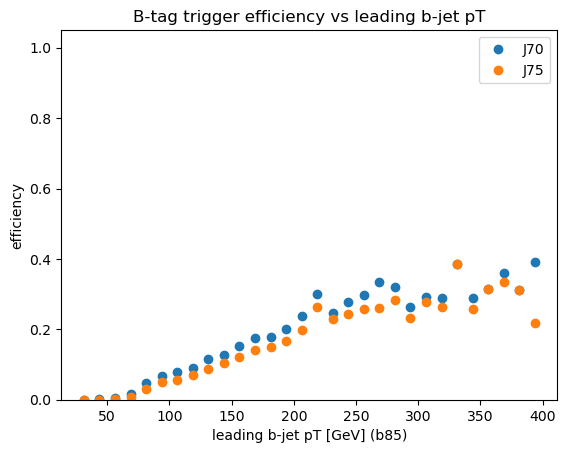

In [19]:
#  b-tag trigger efficiency vs leading b-jet pt (b85 jets) 

lead_bjet_pt = []

for i in range(len(df)):
    pts = df["jet_pt_NOSYS"][i]  # jet pts (MeV)
    b85 = df["jet_GN2v01_FixedCutBEff_85_select"][i]  # 0/1 flags

    bpts = []
    for j in range(len(pts)):
        if b85[j] == 1:
            bpts.append(pts[j])

    if len(bpts) > 0:
        lead_bjet_pt.append(max(bpts) / 1000.0)  # GeV
    else:
        lead_bjet_pt.append(np.nan)

lead_bjet_pt = np.array(lead_bjet_pt)

print("lead b-jet pt min/max (GeV):", np.nanmin(lead_bjet_pt), np.nanmax(lead_bjet_pt))
print("fraction of events with >=1 b85 jet:", np.isfinite(lead_bjet_pt).mean())

bins_b = np.linspace(0, 400, 33)
centers = []
eff_j70_bpt = []
eff_j75_bpt = []

for i in range(len(bins_b) - 1):
    lo = bins_b[i]
    hi = bins_b[i + 1]
    sel = (lead_bjet_pt >= lo) & (lead_bjet_pt < hi) & np.isfinite(lead_bjet_pt)

    centers.append((lo + hi) / 2)


    if sel.sum() < 20:   # smaller cutoff because b-jets might be rarer????
        eff_j70_bpt.append(np.nan)
        eff_j75_bpt.append(np.nan)
    else:
        eff_j70_bpt.append(j70[sel].mean())
        eff_j75_bpt.append(j75[sel].mean())

plt.figure()
plt.plot(centers, eff_j70_bpt, "o", label="J70")
plt.plot(centers, eff_j75_bpt, "o", label="J75")
plt.xlabel("leading b-jet pT [GeV] (b85)")
plt.ylabel("efficiency")
plt.ylim(0, 1.05)
plt.legend()
plt.title("B-tag trigger efficiency vs leading b-jet pT")
plt.show()


In [14]:
print("Trigger Study Summary")

# basic efficiencies
print("Basic efficiencies:")
print(" PF-MET:", round(met_pf.mean(), 3))
print(" J70:", round(j70.mean(), 3))
print(" J75:", round(j75.mean(), 3))
print(" TAU pf:", round(tau_pf.mean(), 3))
print(" TAU tcp:", round(tau_tcp.mean(), 3))
print()

# overlaps
print("Overlaps with PF-MET:")

j70_only = (j70 & ~met_pf).sum()
j75_only = (j75 & ~met_pf).sum()


if j70.sum() > 0:
    print(" frac(J70 not PF):", round(j70_only / j70.sum(), 3))

if j75.sum() > 0:
    print(" frac(J75 not PF):", round(j75_only / j75.sum(), 3))

tau_only = (tau_pf & ~met_pf).sum()
if tau_pf.sum() > 0:
    print(" frac(tau_pf not PF):", round(tau_only / tau_pf.sum(), 3))

print()

# OR gains
print("OR efficiencies:")
print(" PF only:", round(met_pf.mean(), 3))
print(" PF OR J70:", round((met_pf | j70).mean(), 3))
print(" PF OR J75:", round((met_pf | j75).mean(), 3))
print(" PF OR J70 OR J75:", round((met_pf | j70 | j75).mean(), 3))
print(" PF OR J70 OR tau:", round((met_pf | j70 | tau_pf).mean(), 3))
print(" PF OR all:", round((met_pf | met_hi | j70 | j75 | tau_pf | tau_tcp).mean(), 3))

print()




Trigger Study Summary
Basic efficiencies:
 PF-MET: 0.146
 J70: 0.048
 J75: 0.036
 TAU pf: 0.025
 TAU tcp: 0.027

Overlaps with PF-MET:
 frac(J70 not PF): 0.719
 frac(J75 not PF): 0.703
 frac(tau_pf not PF): 0.265

OR efficiencies:
 PF only: 0.146
 PF OR J70: 0.181
 PF OR J75: 0.172
 PF OR J70 OR J75: 0.181
 PF OR J70 OR tau: 0.187
 PF OR all: 0.196

